In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import cv2
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings("ignore")

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import import_ipynb

In [14]:
data=pd.read_csv("data_train.csv",index_col=0)

In [18]:
# Fonction qui extrait l'histogramme des images 

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in tqdm(zip(data['img_path'], data['Malade'])):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)


0it [00:00, ?it/s]

In [19]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [20]:
##############################################RandomForestClassifier####################################################
################################################################################################################

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

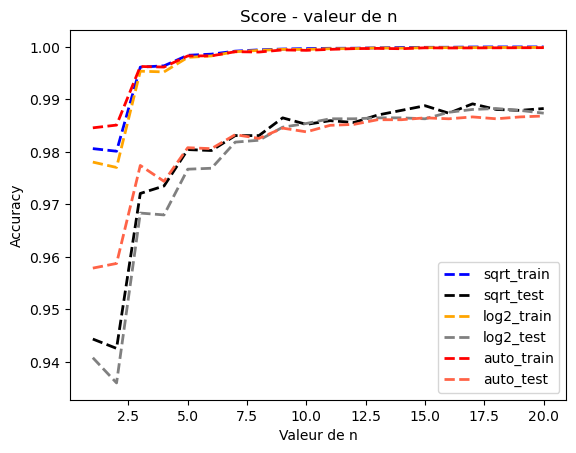

In [21]:
score_sqrt= []
score_log2= []
score_None= []
n_features=512

score_sqrt1= []
score_log21= []
score_None1= []

for n in tqdm(range(1,21,1)):
    rf = RandomForestClassifier(criterion='entropy',max_features='sqrt', n_estimators = n,random_state=1)
    rf.fit(X_train, y_train)
    score_sqrt.append(rf.score(X_train, y_train))
    score_sqrt1.append(rf.score(X_test, y_test))

for n in tqdm(range(1,21,1)):
    rf = RandomForestClassifier(criterion='entropy',max_features='log2', n_estimators = n,random_state=1)
    rf.fit(X_train, y_train)
    score_log2.append(rf.score(X_train, y_train))
    score_log21.append(rf.score(X_test, y_test))

    
for n in tqdm(range(1,21,1)):
    rf = RandomForestClassifier(criterion='entropy',max_features=n_features, n_estimators = n,random_state=1)
    rf.fit(X_train, y_train)
    score_None.append(rf.score(X_train, y_train))
    score_None1.append(rf.score(X_test, y_test))

    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,21,1),score_sqrt, color='blue', linestyle='dashed', lw=2, label='sqrt_train')
plt.plot(range(1,21,1),score_sqrt1, color='black', linestyle='dashed', lw=2, label='sqrt_test')

plt.plot(range(1,21,1), score_log2, color='orange', linestyle='dashed', lw=2, label='log2_train')
plt.plot(range(1,21,1), score_log21, color='gray', linestyle='dashed', lw=2, label='log2_test')

plt.plot(range(1,21,1), score_None, color='red', linestyle='dashed', lw=2, label='auto_train')
plt.plot(range(1,21,1), score_None1, color='tomato', linestyle='dashed', lw=2, label='auto_test')


plt.title('Score - valeur de n')  
plt.xlabel('Valeur de n')  
plt.ylabel('Accuracy') 
plt.legend();